# KPMG E-Commerce PROJECT

### IMPORTING LIBRARIES

In [1]:
import os
import pandas as pd
import numpy as np
import pandas_profiling as pf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

### SETTING DF DISPLAY OPTIONS

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [11]:
os.getcwd()

'/Users/dhanyashreegowda/EcommerceAnalytics'

In [12]:
os.chdir("/Users/dhanyashreegowda/Desktop/github/E-Commerce ")

In [13]:
os.getcwd()

'/Users/dhanyashreegowda/Desktop/github/E-Commerce '

### READING DATA FILE

In [14]:
FullRaw = pd.read_csv('E-com_Data.csv')

/Users/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
FullRaw.head()

CustomerID Item Code  InvoieNo Date of purchase  Quantity        Time  \
0      4355.0     15734  398177.0         10/29/17       6.0  3:36:00 PM   
1      4352.0     14616  394422.0          10/5/17       2.0  2:53:00 PM   
2      4352.0     14614  394422.0         10/12/17       2.0  2:53:00 PM   
3      4352.0    85014B  388633.0          8/22/17       3.0  2:47:00 PM   
4      4352.0     15364  394422.0         10/10/17       2.0  2:53:00 PM   

   price per Unit   Price Shipping Location Cancelled_status Reason of return  \
0           321.0  1926.0        Location 1              NaN              NaN   
1           870.0  1740.0        Location 1              NaN              NaN   
2           933.0  1866.0        Location 1              NaN              NaN   
3           623.0  1869.0        Location 1              NaN              NaN   
4           944.0  1888.0        Location 1              NaN              NaN   

   Sold as set  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [16]:
Data_Report = pf.ProfileReport(FullRaw, title = "E-Com Data Report")
Data_Report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##### THERE ARE 4349 UNIQUE CUSTOMERS
##### THERE ARE 9 DUPLICATE ROWS
##### THERE ARE 24.9%(136927) OF MISSING CUSTOMER ID
##### THERE ARE 4009 UNIQUE ITEMS
##### THERE ARE 24928 UNIQUE INVOICE NUMBERS
##### HIGHEST NUMBER OF PRODUCTS SHIPPED FROM LOCATION 36(501963 - QUANTITY(CONSIST OF ALL RETURNED PRODUCTS))

##### THERE ARE 5 CONTINOUS VARIABLES AND 4 NON CONTINOUS FEATURES
##### CONTINOUS : CustomerID, InvoieNo, Quantity, Price per Unit and Price
##### NON CONTINOUS : Item Code, Date of purchase, Time and Shipping Location

In [23]:
FullRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [18]:
FullRaw.shape

(541116, 12)

In [19]:
FullRaw.dtypes

CustomerID           float64
Item Code             object
InvoieNo             float64
Date of purchase      object
Quantity             float64
Time                  object
price per Unit       float64
Price                float64
Shipping Location     object
Cancelled_status      object
Reason of return      object
Sold as set          float64
dtype: object

In [33]:
FullRaw.duplicated().sum()

0

In [29]:
FullRaw = FullRaw.drop_duplicates(keep='first')

In [13]:
FullRaw.InvoieNo.nunique()

24928

In [34]:
FullRaw.CustomerID.nunique()

4349

In [32]:
FullRaw.describe()

CustomerID       InvoieNo       Quantity  price per Unit         Price  Sold as set
count  404181.000000  537970.000000  537970.000000   537970.000000  537970.00000          0.0
mean     2181.897630  385017.461797       9.343393      378.341540    2161.43735          NaN
std      1252.681271   13426.045830      27.623532      440.051642    4538.52049          NaN
min         2.000000  361429.000000   -2003.000000        1.000000  -10152.00000          NaN
25%      1207.000000  372961.000000       1.000000      169.000000     451.00000          NaN
50%      2078.000000  385705.500000       3.000000      261.000000    1194.00000          NaN
75%      3291.000000  396870.000000      10.000000      456.000000    2232.00000          NaN
max      4372.000000  406651.000000    3186.000000    64973.000000   90400.00000          NaN

### DROPPING NEGATIVE VALUES 

#### Negative values in Quantity and Price,

#### We can remove negative values, which indicates returned product and not impacting business in Sales/Monetary Terms

#### We are dropping rows which has negative quantity and price.

In [16]:
FullRaw = FullRaw[(FullRaw['Quantity']>0) & (FullRaw['Price']>0)]

In [17]:
FullRaw.describe()

CustomerID      InvoieNo       Quantity  price per Unit          Price  Cancelled_status  Sold as set
count  395998.000000  528467.00000  528467.000000   528467.000000  528467.000000               0.0          0.0
mean     2186.423482  385042.30277       9.700390      377.394413    2227.083481               NaN          NaN
std      1252.325963   13434.19497      27.190851      437.454412    4546.687166               NaN          NaN
min         2.000000  361429.00000       1.000000        1.000000       1.000000               NaN          NaN
25%      1212.000000  372970.00000       1.000000      169.000000     473.000000               NaN          NaN
50%      2080.000000  385765.00000       3.000000      261.000000    1244.000000               NaN          NaN
75%      3294.000000  396914.00000      10.000000      455.000000    2256.000000               NaN          NaN
max      4372.000000  406651.00000    3186.000000    64973.000000   90400.000000               NaN          NaN

In [18]:
FullRaw.InvoieNo.nunique()

20436

In [19]:
FullRaw.CustomerID.nunique()

4324

In [20]:
FullRaw['Item Code'].nunique()

3897

#### There were 4349 Customers, 4009 Item Codes and 24928 Unique Invoices Earlier
#### 25 Customers have ordered then returned / cancelled the product

#### MODIFYING THE NAMES OF FEATURE'S

In [35]:
FullRaw.rename(index=str, columns={'CustomerID'       : 'CustomerID',
                              'Item Code'        : 'Item_Code',
                              'InvoieNo'         : 'InvoiceNo',
                              'Date of purchase' : 'Date_of_purchase',
                              'Quantity'         : 'Quantity',
                              'Time'             : 'Time',
                              'price per Unit'   : 'price_per_Unit',
                              'Price'            : 'Revenue',
                              'Shipping Location': 'Shipping_Location'}, inplace=True)

##### CHANGING DATATYPES OF DATE OF PURCHASE

In [22]:
FullRaw['Date_of_purchase'] = pd.to_datetime(FullRaw['Date_of_purchase'])
FullRaw.dtypes

CustomerID                  float64
Item_Code                    object
InvoiceNo                     int64
Date_of_purchase     datetime64[ns]
Quantity                      int64
Time                         object
price_per_Unit              float64
Revenue                     float64
Shipping_Location            object
Cancelled_status            float64
Reason of return             object
Sold as set                 float64
dtype: object

### REMOVING COLUMNS

#### SINCE CANCELLED STATUS, REASON OF RETURN AND SOLD AS SET HAVE 99-100% MISSING VALUES, ITS NOT IMPACTING THE BUSINESS SALES IN MONETARY TERMS

In [23]:
FullRaw.drop(['Cancelled_status','Reason of return','Sold as set'], axis = 1, inplace = True)

In [24]:
FullRaw.shape

(528467, 9)

In [25]:
FullRaw.isnull().sum()

CustomerID           132469
Item_Code                 0
InvoiceNo                 0
Date_of_purchase          0
Quantity                  0
Time                      0
price_per_Unit            0
Revenue                   0
Shipping_Location         0
dtype: int64

In [26]:
FullRaw=FullRaw.dropna()
FullRaw.shape

(395998, 9)

In [27]:
FullRaw.head()

CustomerID Item_Code  InvoiceNo Date_of_purchase  Quantity        Time  price_per_Unit  Revenue Shipping_Location
0      4355.0     15734     398177       2017-10-29         6  3:36:00 PM           321.0   1926.0        Location 1
1      4352.0     14616     394422       2017-10-05         2  2:53:00 PM           870.0   1740.0        Location 1
2      4352.0     14614     394422       2017-10-12         2  2:53:00 PM           933.0   1866.0        Location 1
3      4352.0    85014B     388633       2017-08-22         3  2:47:00 PM           623.0   1869.0        Location 1
4      4352.0     15364     394422       2017-10-10         2  2:53:00 PM           944.0   1888.0        Location 1

In [27]:
Data_Report = pf.ProfileReport(FullRaw, title = "E-Com Data Report")
Data_Report

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### AFTER DATA PRE-PROCESSING WE HAVE

##### THERE ARE 4324 UNIQUE CUSTOMERS
##### THERE ARE 0 DUPLICATE ROWS
##### THERE ARE NO MISSING CUSTOMER ID
##### THERE ARE 3637 UNIQUE ITEMS
##### THERE ARE 18305 UNIQUE INVOICE NUMBERS
##### HIGHEST NUMBER OF PRODUCTS SHIPPED FROM LOCATION 36(368829 - QUANTITY)
##### DATA SHAPE IS (395998,9)

In [28]:
FullRaw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395998 entries, 0 to 537949
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         395998 non-null  float64       
 1   Item_Code          395998 non-null  object        
 2   InvoiceNo          395998 non-null  int64         
 3   Date_of_purchase   395998 non-null  datetime64[ns]
 4   Quantity           395998 non-null  int64         
 5   Time               395998 non-null  object        
 6   price_per_Unit     395998 non-null  float64       
 7   Revenue            395998 non-null  float64       
 8   Shipping_Location  395998 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 30.2+ MB


<AxesSubplot:xlabel='Count', ylabel='Shipping_Location'>

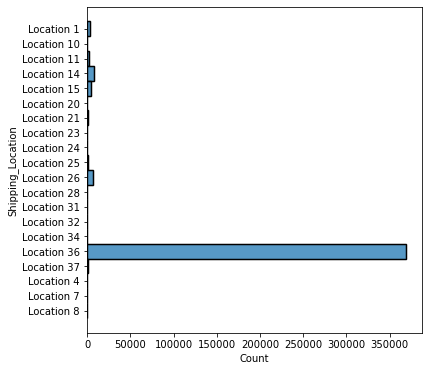

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.histplot(data = FullRaw, y="Shipping_Location")

<AxesSubplot:xlabel='Revenue', ylabel='Month'>

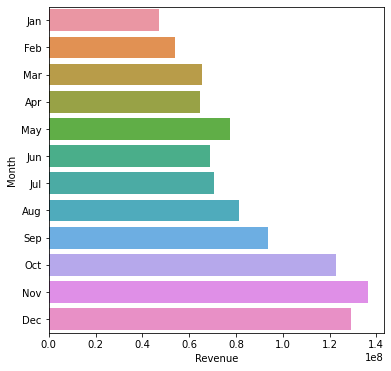

In [30]:
FullRaw['Month'] = FullRaw['Date_of_purchase'].dt.strftime('%b')

Amount_by_Month = FullRaw.groupby(['Month'])['Revenue'].sum()
Amount_by_Month = Amount_by_Month.reset_index()
Amount_by_Month.columns = ["Month", "Revenue"]
Sort_Order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
Amount_by_Month.index = pd.CategoricalIndex(Amount_by_Month["Month"], categories = Sort_Order, ordered = True)
Amount_by_Month = Amount_by_Month.sort_index().reset_index(drop = True)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
##sns.lineplot(x = 'Month', y = 'Revenue', data = Amount_by_Month, sort = False)
sns.barplot(x = 'Revenue', y = 'Month', data = Amount_by_Month)

### RFM METRICS

In [31]:
FullRaw.head()

CustomerID Item_Code  InvoiceNo Date_of_purchase  Quantity        Time  price_per_Unit  Revenue Shipping_Location Month
0      4355.0     15734     398177       2017-10-29         6  3:36:00 PM           321.0   1926.0        Location 1   Oct
1      4352.0     14616     394422       2017-10-05         2  2:53:00 PM           870.0   1740.0        Location 1   Oct
2      4352.0     14614     394422       2017-10-12         2  2:53:00 PM           933.0   1866.0        Location 1   Oct
3      4352.0    85014B     388633       2017-08-22         3  2:47:00 PM           623.0   1869.0        Location 1   Aug
4      4352.0     15364     394422       2017-10-10         2  2:53:00 PM           944.0   1888.0        Location 1   Oct

#### RFM TABLE
#### MONETARY

##### IN MONETARY WE ARE CALCUTATING THE TOTAL AMOUNT/REVENUE SPENT PER CUSTOMER.

#### FREQUENCY

##### IN FREQUENCY WE CALCULATING THE UNIQUE COUNT OF ORDERS MADE BY EACH CUSTOMER BASED ON CUSTOMER ID.

#### RECENCY

##### IN RECENCY WE ARE TAKING MAX/LAST DATE OF PURCHASE AS A STANDARD DATE BASED ON WHICH WE ARE CALCULATING RECENCY.
##### MAX DATE = 2017-12-19

In [32]:
max(FullRaw["Date_of_purchase"])

Timestamp('2017-12-19 00:00:00')

In [33]:
min(FullRaw["Date_of_purchase"])

Timestamp('2016-12-02 00:00:00')

In [34]:
maxi= max(FullRaw["Date_of_purchase"]) + pd.DateOffset(days=1)
maxi

Timestamp('2017-12-20 00:00:00')

In [35]:
RFM = FullRaw.groupby('CustomerID').agg({'Date_of_purchase':lambda x:(maxi-x.max()).days,
                                         'InvoiceNo':lambda x:x.nunique(),'Revenue':lambda x:x.sum()})
RFM = RFM.reset_index()
RFM.head()

CustomerID  Date_of_purchase  InvoiceNo   Revenue
0         2.0                 4          7  553704.0
1         3.0                77          4  257404.0
2         4.0                19          1  176613.0
3         5.0               311          1   41976.0
4         6.0                37          7  166972.0

In [36]:
RFM.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
RFM.head()

CustomerID  Recency  Frequency  Monetary
0         2.0        4          7  553704.0
1         3.0       77          4  257404.0
2         4.0       19          1  176613.0
3         5.0      311          1   41976.0
4         6.0       37          7  166972.0

#### VISUALIZATION

C:\Users\Nitin Satija\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Recency', ylabel='Density'>

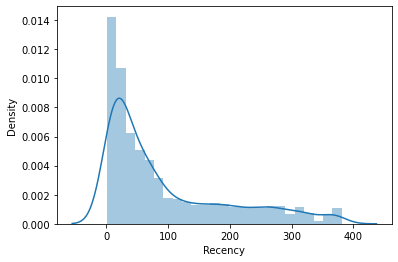

In [37]:
sns.distplot(RFM['Recency'])

C:\Users\Nitin Satija\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Frequency', ylabel='Density'>

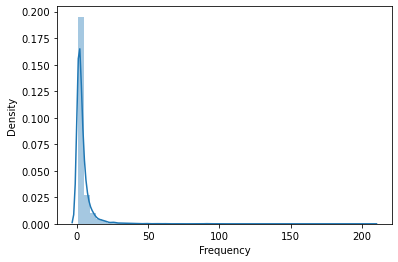

In [38]:
sns.distplot(RFM['Frequency'])

C:\Users\Nitin Satija\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monetary', ylabel='Density'>

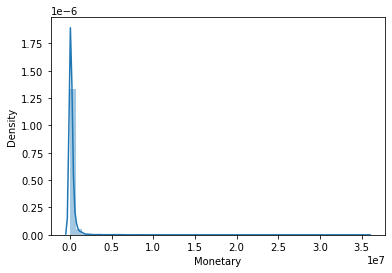

In [39]:
sns.distplot(RFM['Monetary'])

C:\Users\Nitin Satija\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Monetary', ylabel='Recency'>

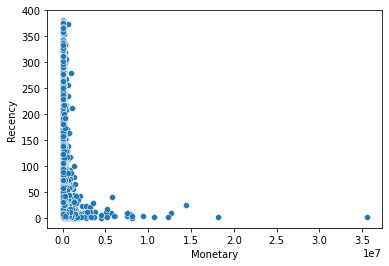

In [40]:
sns.scatterplot(RFM['Monetary'], RFM['Recency'])

C:\Users\Nitin Satija\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Monetary', ylabel='Frequency'>

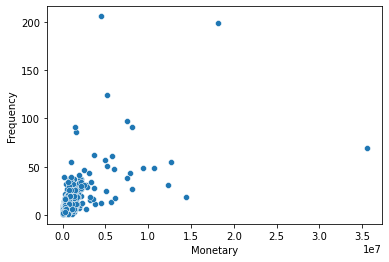

In [41]:
sns.scatterplot(RFM['Monetary'], RFM['Frequency'])

#### SCORE CALCULATION

In [42]:
RFM_Score_Seg = RFM.copy(deep=True)
RFM_Score_Seg.head()

CustomerID  Recency  Frequency  Monetary
0         2.0        4          7  553704.0
1         3.0       77          4  257404.0
2         4.0       19          1  176613.0
3         5.0      311          1   41976.0
4         6.0       37          7  166972.0

##### COMPUTING QUANTILE OF RFM
##### CUSTOMERS WITH THE HIGHEST RECENCY, FREQUENCY AND MONETARY AMOUNTS CONSIDERED AS TOP CUSTOMERS.

In [43]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)

def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
#higher value of frequency and monetary lead to a good consumer.

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

quantile = RFM_Score_Seg.quantile(q=[0.25,0.5,0.75])
quantile

CustomerID  Recency  Frequency   Monetary
0.25     1092.75    19.00        1.0   39288.00
0.50     2182.50    52.00        2.0   86147.00
0.75     3279.25   143.25        5.0  210833.75

In [44]:
RFM_Score_Seg['r_quartile'] = RFM_Score_Seg['Recency'].apply(RScore,args=('Recency',quantile))
RFM_Score_Seg['f_quartile'] = RFM_Score_Seg['Frequency'].apply(FMScore,args=('Frequency',quantile))
RFM_Score_Seg['m_quartile'] = RFM_Score_Seg['Monetary'].apply(FMScore,args=('Monetary',quantile))

##### COMBINE ALL THREE QUARTILES(r_quartile,f_quartile,m_quartile) IN A SINGLE COLUMN
##### THIS RANK WILL HELP SEGMENT THE CUSTOMER'S GROUP.

In [45]:
RFM_Score_Seg['RFM_Score'] = RFM_Score_Seg.r_quartile.astype(str)+ RFM_Score_Seg.f_quartile.astype(str)+ RFM_Score_Seg.m_quartile.astype(str)

RFM_Score_Seg.head()

CustomerID  Recency  Frequency  Monetary  r_quartile  f_quartile  m_quartile RFM_Score
0         2.0        4          7  553704.0           4           4           4       444
1         3.0       77          4  257404.0           2           3           4       234
2         4.0       19          1  176613.0           4           1           3       413
3         5.0      311          1   41976.0           1           1           2       112
4         6.0       37          7  166972.0           3           4           3       343

In [46]:
RFM_Score_Seg['RFM_Score_Sum'] = RFM_Score_Seg[['r_quartile','f_quartile','m_quartile']].sum(axis=1)
RFM_Score_Seg.head()

CustomerID  Recency  Frequency  Monetary  r_quartile  f_quartile  m_quartile RFM_Score  RFM_Score_Sum
0         2.0        4          7  553704.0           4           4           4       444             12
1         3.0       77          4  257404.0           2           3           4       234              9
2         4.0       19          1  176613.0           4           1           3       413              8
3         5.0      311          1   41976.0           1           1           2       112              4
4         6.0       37          7  166972.0           3           4           3       343             10

In [47]:
Loyalty_Level = ['Bronze','Silver','Gold','Platinum']
Score_Qant = pd.qcut(RFM_Score_Seg.RFM_Score_Sum, q = 4, labels = Loyalty_Level)
RFM_Score_Seg['RFM_Loyalty_Level'] = Score_Qant.values
RFM_Score_Seg.head()

CustomerID  Recency  Frequency  Monetary  r_quartile  f_quartile  m_quartile RFM_Score  RFM_Score_Sum RFM_Loyalty_Level
0         2.0        4          7  553704.0           4           4           4       444             12          Platinum
1         3.0       77          4  257404.0           2           3           4       234              9              Gold
2         4.0       19          1  176613.0           4           1           3       413              8              Gold
3         5.0      311          1   41976.0           1           1           2       112              4            Bronze
4         6.0       37          7  166972.0           3           4           3       343             10              Gold

In [48]:
RFM_Score_Seg

CustomerID  Recency  Frequency  Monetary  r_quartile  f_quartile  m_quartile RFM_Score  RFM_Score_Sum RFM_Loyalty_Level
0            2.0        4          7  553704.0           4           4           4       444             12          Platinum
1            3.0       77          4  257404.0           2           3           4       234              9              Gold
2            4.0       19          1  176613.0           4           1           3       413              8              Gold
3            5.0      311          1   41976.0           1           1           2       112              4            Bronze
4            6.0       37          7  166972.0           3           4           3       343             10              Gold
...          ...      ...        ...       ...         ...         ...         ...       ...            ...               ...
4319      4368.0      278          1   20480.0           1           1           1       111              3            Bronze
4320      4369.0      181          1   10774.0           1           1           1       111              3            Bronze
4321      4370.0        9          2   25177.0           4           2           1       421              7            Silver
4322      4371.0        4         16  280608.0           4           4           4       444             12          Platinum
4323      4372.0       44          3  262820.0           3           3           4       334             10              Gold

[4324 rows x 10 columns]

In [49]:
RFM_Score_Seg.RFM_Score.value_counts()

444    465
111    464
112    200
211    197
333    191
344    183
433    172
233    151
212    151
311    146
312    104
234    102
122     98
334     95
222     94
434     89
223     89
322     81
422     75
232     73
332     70
123     64
411     64
244     64
323     61
121     60
443     56
213     55
423     54
432     52
343     47
113     47
321     44
133     44
132     43
221     37
412     32
421     30
243     20
313     17
214     13
131     12
134     12
224     11
144     11
324     11
331      9
231      9
124      8
114      8
143      7
431      7
413      6
424      6
314      3
242      3
442      3
142      2
441      1
141      1
Name: RFM_Score, dtype: int64

##### TOP/BEST CUSTOMERS

In [50]:
RFM_Score_Seg[RFM_Score_Seg['RFM_Score']=='444'].sort_values('Monetary', ascending=False).head()

CustomerID  Recency  Frequency    Monetary  r_quartile  f_quartile  m_quartile RFM_Score  RFM_Score_Sum RFM_Loyalty_Level
1687      1704.0        3         69  35536194.0           4           4           4       444             12          Platinum
1877      1896.0        2        199  18148261.0           4           4           4       444             12          Platinum
1331      1346.0       10         55  12657119.0           4           4           4       444             12          Platinum
3760      3802.0        3         31  12367652.0           4           4           4       444             12          Platinum
4188      4234.0        3         49  10654918.0           4           4           4       444             12          Platinum

##### LOYAL CUSTOMERS

In [51]:
RFM_Score_Seg[RFM_Score_Seg['RFM_Score']=='421'].sort_values('Monetary', ascending=True).head()

CustomerID  Recency  Frequency  Monetary  r_quartile  f_quartile  m_quartile RFM_Score  RFM_Score_Sum RFM_Loyalty_Level
1787      1806.0       19          2   12216.0           4           2           1       421              7            Silver
4005      4050.0       12          2   14109.0           4           2           1       421              7            Silver
1842      1861.0       17          2   14376.0           4           2           1       421              7            Silver
3732      3774.0       15          2   15756.0           4           2           1       421              7            Silver
3299      3336.0       12          2   17285.0           4           2           1       421              7            Silver

### CLUSTERING WITH MAIN DATASET

In [52]:
FullRaw_Clustering = FullRaw.copy(deep=True)
FullRaw_Clustering.head()

CustomerID Item_Code  InvoiceNo Date_of_purchase  Quantity        Time  price_per_Unit  Revenue Shipping_Location Month
0      4355.0     15734     398177       2017-10-29         6  3:36:00 PM           321.0   1926.0        Location 1   Oct
1      4352.0     14616     394422       2017-10-05         2  2:53:00 PM           870.0   1740.0        Location 1   Oct
2      4352.0     14614     394422       2017-10-12         2  2:53:00 PM           933.0   1866.0        Location 1   Oct
3      4352.0    85014B     388633       2017-08-22         3  2:47:00 PM           623.0   1869.0        Location 1   Aug
4      4352.0     15364     394422       2017-10-10         2  2:53:00 PM           944.0   1888.0        Location 1   Oct

##### DROPPING TIME, PRICE PER UNIT, QUANTITY AND MONTH COLUMNS

In [53]:
FullRaw_Clustering.drop(['Time', 'price_per_Unit', 'Quantity', 'Month'], axis = 1, inplace = True)
FullRaw_Clustering.shape

(395998, 6)

In [54]:
FullRaw_Clustering.dtypes

CustomerID                  float64
Item_Code                    object
InvoiceNo                     int64
Date_of_purchase     datetime64[ns]
Revenue                     float64
Shipping_Location            object
dtype: object

In [55]:
FullRaw_Clustering["Date_of_purchase"] = FullRaw_Clustering["Date_of_purchase"].astype(str)

#### CHANGING NON-CONTINOUS TO CONTINOUS VARIABLES

In [56]:
encoder = LabelEncoder()

FullRaw_Clustering['Item_Code'] = encoder.fit_transform(FullRaw_Clustering['Item_Code'])
FullRaw_Clustering['Date_of_purchase'] = encoder.fit_transform(FullRaw_Clustering['Date_of_purchase'])
FullRaw_Clustering['Shipping_Location'] = encoder.fit_transform(FullRaw_Clustering['Shipping_Location'])

In [57]:
FullRaw_Clustering = FullRaw_Clustering.reset_index()
FullRaw_Clustering.drop(['index'], axis = 1, inplace = True)

In [58]:
FullRaw_Clustering.shape

(395998, 6)

#### STANDARDIZATION

In [59]:
FullRaw_Clustering_Scaling = StandardScaler().fit(FullRaw_Clustering)
FullRaw_Clustering_Std = FullRaw_Clustering_Scaling.transform(FullRaw_Clustering)
FullRaw_Clustering_Std = pd.DataFrame(FullRaw_Clustering_Std, columns = FullRaw_Clustering.columns)

FullRaw_Clustering_Std.head()

CustomerID  Item_Code  InvoiceNo  Date_of_purchase   Revenue  Shipping_Location
0    1.731641   0.618156   0.953165          0.931628 -0.128264          -5.371837
1    1.729246  -0.616799   0.666687          0.718529 -0.166196          -5.371837
2    1.729246  -0.619138   0.666687          0.780683 -0.140500          -5.371837
3    1.729246   2.105716   0.225031          0.327846 -0.139888          -5.371837
4    1.729246   0.213521   0.666687          0.762924 -0.136013          -5.371837

#### CALCULATING NUMBER OF CLUSTERS

##### ELBOW METHOD

In [60]:
WSS = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state = 123).fit(FullRaw_Clustering_Std)
    WSS.append(kmeans.inertia_)

WSS

[2375987.9999999353,
 1764897.677933506,
 1431517.6495252794,
 1260673.6357591867,
 1032561.022396422,
 902787.7785971275,
 812463.507257721,
 741282.3224805971,
 687240.3039619938,
 643877.5153796237,
 601870.2663092331,
 572995.8100097922,
 542821.8734511507,
 519725.1596351662]

##### ELBOW PLOT

<AxesSubplot:>

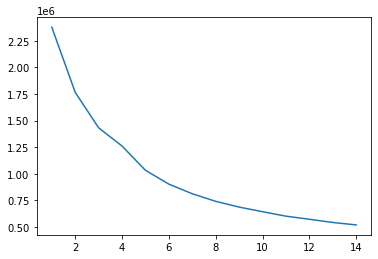

In [61]:
sns.lineplot(x=range(1,15), y = WSS)

#### MODELING

##### FROM ELBOW PLOT, WE CANNOT DEFINE NUMBER OF CLUSTERS BECAUSE OF A CURVE SHAPE. SO BASED ON SILHOUETTE WE ARE GOING WITH  3 CLUSTER MODEL.

##### CLUSTERING WITH 3 CLUSTERS

In [62]:
Kmeans_Model = KMeans(n_clusters=3, random_state = 777).fit(FullRaw_Clustering_Std)
Kmeans_Model.labels_

array([2, 2, 2, ..., 1, 1, 1])

##### COMBINING CLUSTER INFO WITH MAIN DATASET

In [63]:
FullRaw2 = pd.concat([FullRaw_Clustering, pd.Series(Kmeans_Model.labels_)], axis = 1).rename(columns = {0:'Cluster'})
FullRaw2.head()

CustomerID  Item_Code  InvoiceNo  Date_of_purchase  Revenue  Shipping_Location  Cluster
0      4355.0       2031     398177               329   1926.0                  0        2
1      4352.0        975     394422               305   1740.0                  0        2
2      4352.0        973     394422               312   1866.0                  0        2
3      4352.0       3303     388633               261   1869.0                  0        2
4      4352.0       1685     394422               310   1888.0                  0        2

In [64]:
FullRaw2.shape

(395998, 7)

##### CLUSTER SIZES

In [65]:
FullRaw2['Cluster'].value_counts()

0    213312
1    164027
2     18659
Name: Cluster, dtype: int64

##### NUMBER OF UNIQUE CUSTOMERS IN EACH CLUSTERS

In [66]:
Num_of_Unique_Customers_in_Each_Clusters = FullRaw2.groupby('Cluster')['CustomerID'].nunique()
Num_of_Unique_Customers_in_Each_Clusters

Cluster
0    3403
1    3013
2    2832
Name: CustomerID, dtype: int64

In [67]:
FullRaw2['CustomerID'].nunique()

4324

##### MERGING LOYALTY LEVELS FROM RFM SEGMENTATION OF DATA TO CLUSTERING DATA

In [68]:
newdf = pd.DataFrame(RFM_Score_Seg, columns = ['CustomerID','RFM_Loyalty_Level'])
newdf

CustomerID RFM_Loyalty_Level
0            2.0          Platinum
1            3.0              Gold
2            4.0              Gold
3            5.0            Bronze
4            6.0              Gold
...          ...               ...
4319      4368.0            Bronze
4320      4369.0            Bronze
4321      4370.0            Silver
4322      4371.0          Platinum
4323      4372.0              Gold

[4324 rows x 2 columns]

In [69]:
FullRaw2

CustomerID  Item_Code  InvoiceNo  Date_of_purchase  Revenue  Shipping_Location  Cluster
0           4355.0       2031     398177               329   1926.0                  0        2
1           4352.0        975     394422               305   1740.0                  0        2
2           4352.0        973     394422               312   1866.0                  0        2
3           4352.0       3303     388633               261   1869.0                  0        2
4           4352.0       1685     394422               310   1888.0                  0        2
...            ...        ...        ...               ...      ...                ...      ...
395993        37.0       1040     402292               359    384.0                 19        0
395994        37.0       1040     402292               358    398.0                 19        0
395995        21.0       2939     363890                19   2464.0                 19        1
395996        21.0       3412     363890                19   4068.0                 19        1
395997        21.0       1040     363890                15   4940.0                 19        1

[395998 rows x 7 columns]

In [70]:
Final_df = pd.merge(FullRaw2,newdf, on = "CustomerID")
Final_df

CustomerID  Item_Code  InvoiceNo  Date_of_purchase  Revenue  Shipping_Location  Cluster RFM_Loyalty_Level
0           4355.0       2031     398177               329   1926.0                  0        2            Silver
1           4355.0       1239     390525               285   1020.0                 15        0            Silver
2           4355.0       1311     390525               278   1032.0                 15        0            Silver
3           4355.0       1312     390525               277   1392.0                 15        0            Silver
4           4355.0       2018     390525               278   1491.0                 15        0            Silver
...            ...        ...        ...               ...      ...                ...      ...               ...
395993         5.0          4     368101                66   3168.0                 15        1            Bronze
395994         5.0       1303     368101                64   3180.0                 15        1            Bronze
395995         5.0       1114     368101                66   3672.0                 15        1            Bronze
395996         5.0        762     368101                66   3696.0                 15        1            Bronze
395997      3244.0       2568     369050                74    501.0                 17        1            Bronze

[395998 rows x 8 columns]

In [71]:
Final_df.to_excel(r'C:\Users\Nitin Satija\Desktop\KPMG Capstone Projects\Ecommerce Analytics\Final_df.xlsx', index = False)

In [71]:
Final_df.RFM_Loyalty_Level.nunique()

4

In [74]:
Final_df['RFM_Loyalty_Level'].value_counts()

Platinum    222145
Gold        109063
Silver       36661
Bronze       28129
Name: RFM_Loyalty_Level, dtype: int64

##### UNIQUE CUSTOMERS WITH THEIR LOYALTY LEVELS IN EACH CLUSTERS

In [73]:
Clusters_Seg = Final_df.groupby(['Cluster', 'RFM_Loyalty_Level'])['CustomerID'].nunique()
Clusters_Seg.columns = ['Cluster', 'RFM_Loyalty_Level', 'Unique Customers']
Clusters_Seg

Cluster  RFM_Loyalty_Level
0        Bronze                637
         Silver                757
         Gold                 1216
         Platinum              793
1        Bronze                891
         Silver                454
         Gold                  936
         Platinum              732
2        Bronze                575
         Silver                562
         Gold                  974
         Platinum              721
Name: CustomerID, dtype: int64

In [74]:
pd.pivot_table(Final_df, 'CustomerID', index = ['Cluster'], columns = ['RFM_Loyalty_Level'], aggfunc = lambda x: len(x.unique()))

RFM_Loyalty_Level  Bronze  Silver    Gold  Platinum
Cluster                                            
0                   637.0   757.0  1216.0     793.0
1                   891.0   454.0   936.0     732.0
2                   575.0   562.0   974.0     721.0

##### CLUSTERING VALIDATION USING SILHOUETTE VALUE

In [ ]:
FullRaw_Clustering_Std2 = pd.concat([FullRaw_Clustering_Std, pd.Series(Kmeans_Model.labels_)], 
                          axis = 1).rename(columns = {0:'Cluster'}).copy()
FullRaw_Clustering_Std2.head()

##### INDIVIDUAL ROW SILHOUETTE SCORES

In [ ]:
sample_silhouette_values = silhouette_samples(FullRaw_Clustering_Std, Kmeans_Model.labels_)
FullRaw_Clustering_Std2['Silhouette_Value'] = sample_silhouette_values
FullRaw_Clustering_Std2.head()

##### CLUSTER-WISE SILHOUETTE SCORES

In [ ]:
FullRaw_Clustering_Std2.groupby(['Cluster'])['Silhouette_Value'].mean()

##### OVERALL SILHOUETTE SCORE

In [ ]:
silhouette_score(FullRaw_Clustering_Std, Kmeans_Model.labels_)

#####  SILHOUETTE SCORE FOR 7 CLUSTER = 0.2643114091008517
#####  SILHOUETTE SCORE FOR 6 CLUSTER = 0.27190954009426516
#####  SILHOUETTE SCORE FOR 5 CLUSTER = 0.26914112430706044
#####  SILHOUETTE SCORE FOR 4 CLUSTER = 0.25606749620845654
#####  SILHOUETTE SCORE FOR 3 CLUSTER = 0.31761150010987615

#### CLUSTER PROFILING AND VISUALISATION

In [75]:
Cluster_Profile_Df = FullRaw2.groupby(['Cluster']).mean()
Cluster_Profile_Df

CustomerID    Item_Code      InvoiceNo  Date_of_purchase      Revenue  Shipping_Location
Cluster                                                                                           
0        2195.331163  1577.582593  395692.548675        310.883457  2453.905866          14.913474
1        2191.017393  1402.980802  372681.757381        111.350973  2646.381651          14.895097
2        2044.205745  1517.293370  385552.169516        222.640549  2905.933812           2.841631

In [76]:
###################
# Bi-variate Plots
###################

# Data Prep for cluster plotting using 2 variables

Final_df['Cluster'] = np.select(
        [Final_df['Cluster'] == 0, 
         Final_df['Cluster'] == 1, 
         Final_df['Cluster'] == 2,],
         ["A", "B", "C"]) 

# The above conversion of [0,1,2] to ["A", "B", "C"] is needed for 
# proper cluster plotting in sns.scatterplot()

In [77]:
# We need sort the data. Lets make a copy of FullRaw2 and 
# sort the copied data (and NOT the original data)
Final_df_Copy = Final_df.copy()
Final_df_Copy.sort_values(['Cluster'], inplace = True) 
# This helps in sorting the legend in sns.scatterplot()

<AxesSubplot:xlabel='Shipping_Location', ylabel='CustomerID'>

C:\Users\Nitin Satija\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


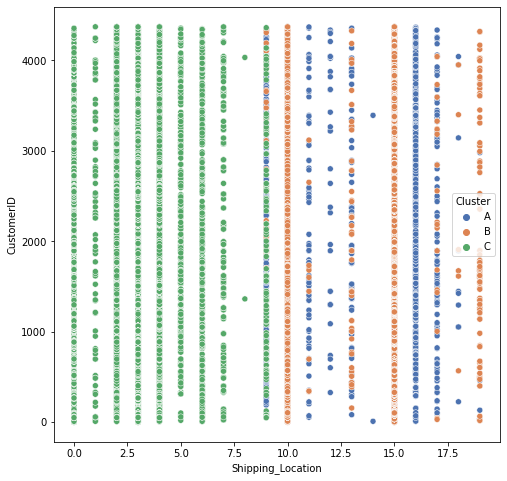

In [79]:
# Shipping Location vs. CustomerID
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.scatterplot(x = 'Shipping_Location', y = 'CustomerID', hue = "Cluster", data = Final_df_Copy, palette = "deep")

<AxesSubplot:xlabel='Shipping_Location', ylabel='Revenue'>

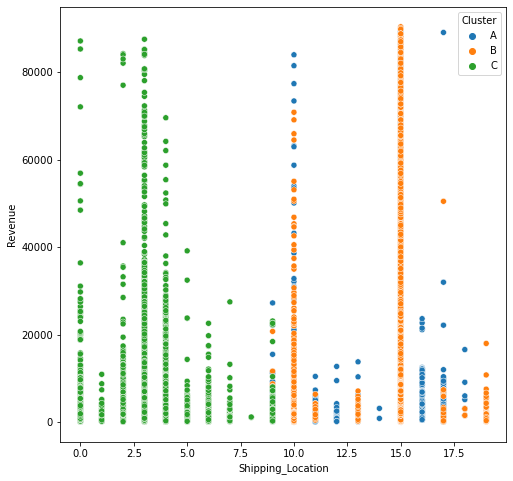

In [80]:
# Shipping Location vs. Price
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.scatterplot(x = 'Shipping_Location', y = 'Revenue', hue = "Cluster", data = Final_df_Copy)

<AxesSubplot:xlabel='Cluster', ylabel='Revenue'>

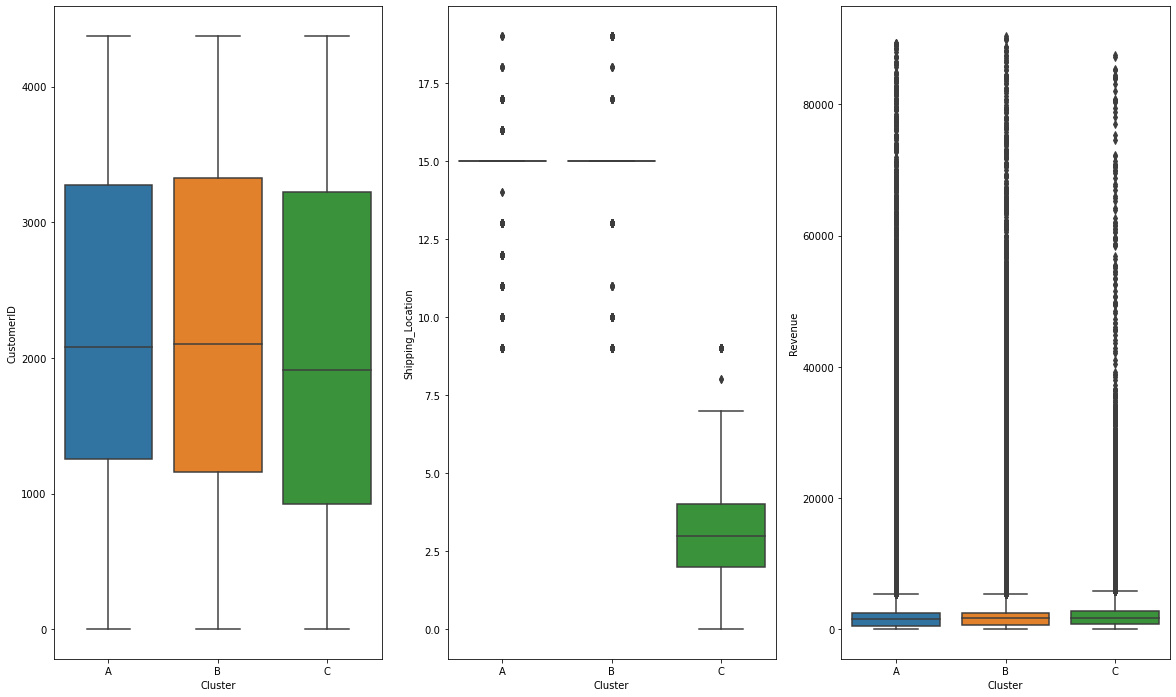

In [81]:
fig, ax = plt.subplots(1, 3, figsize=(20, 12))
sns.boxplot(x='Cluster', y='CustomerID', data=Final_df_Copy, ax=ax[0])
sns.boxplot(x='Cluster', y='Shipping_Location', data=Final_df_Copy, ax=ax[1])
sns.boxplot(x='Cluster', y='Revenue', data=Final_df_Copy, ax=ax[2])

<AxesSubplot:xlabel='Cluster', ylabel='CustomerID'>

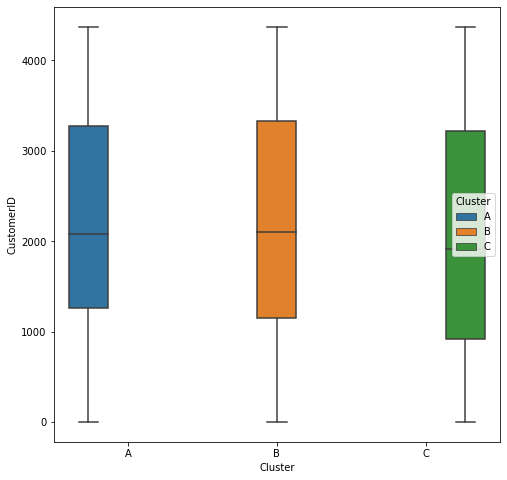

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.boxplot(x = 'Cluster', y = 'CustomerID', hue = "Cluster", data = Final_df_Copy)

<AxesSubplot:xlabel='Cluster', ylabel='Revenue'>

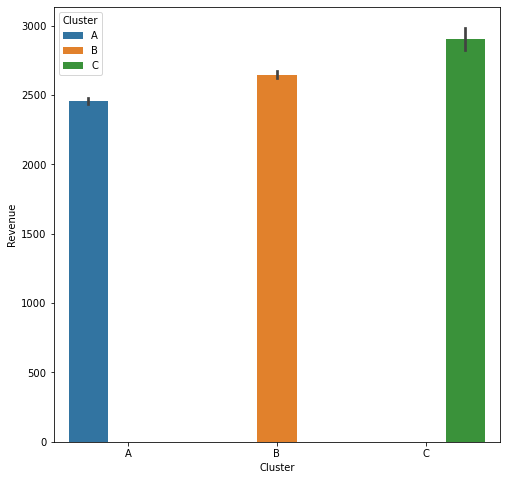

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.barplot(x = 'Cluster', y = 'Revenue', hue = "Cluster", data = Final_df_Copy)

<AxesSubplot:xlabel='RFM_Loyalty_Level', ylabel='CustomerID'>

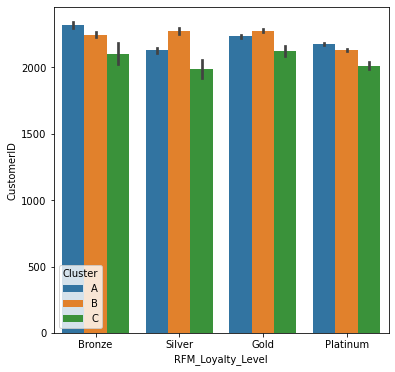

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.barplot(x = 'RFM_Loyalty_Level', y = 'CustomerID', hue = "Cluster", data = Final_df_Copy)

<AxesSubplot:xlabel='Cluster', ylabel='Shipping_Location'>

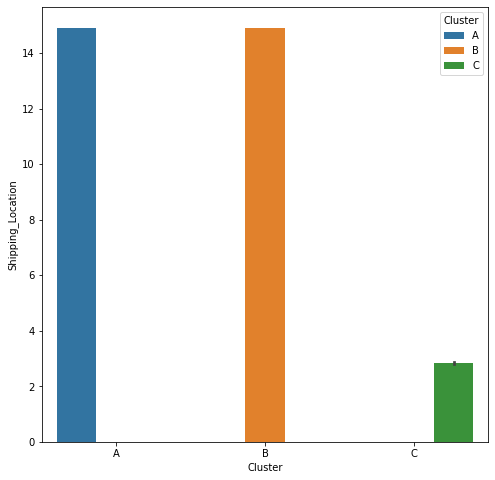

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.barplot(x = 'Cluster', y = 'Shipping_Location', hue = "Cluster", data = Final_df_Copy)

<AxesSubplot:xlabel='RFM_Loyalty_Level', ylabel='Revenue'>

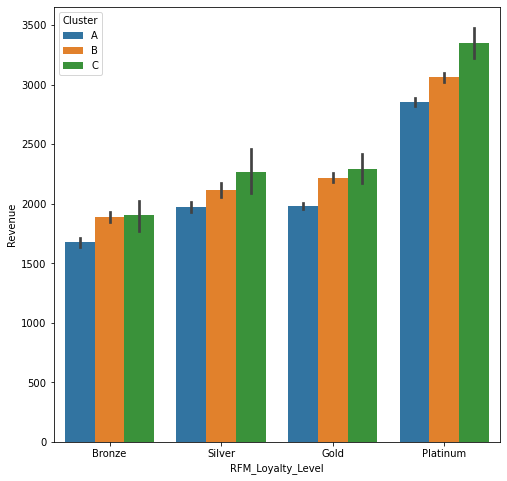

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.barplot(x = 'RFM_Loyalty_Level', y = 'Revenue', hue = "Cluster", data = Final_df_Copy)